In [531]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from operator import add, sub, mul, truediv, __pow__
from math import log


In [95]:
def normalize(x):
    return (x - np.percentile(x, 50))/(np.percentile(x, 99.9)-np.percentile(x, 0.1))

In [ ]:
def gen_func(x):
    funcs = [add, mul, pow]

In [613]:
# Generate dummy data
size = 10000
data = np.random.normal(size=(size, 100))

# col = -1*data[:,1]
# col = np.log(data[:,2])
# col = np.exp(data[:,2])
# col = normalize(col)
# data[:,99] = col

train_size = int(0.9*size)
x_train = data[:train_size]
x_valid = data[train_size:]

noise = 0.1*np.random.normal(size=(size))
# labels = (data[:,1])# V
# labels = (add(data[:,1], data[:,2]))# V
# labels = (sub(data[:,1], data[:,2]))# V
# labels = (mul(data[:,1],data[:,2]))# V
# labels = (truediv(data[:,1], data[:,2]))# X
# labels = sub(np.log(abs(data[:,1])), np.log(abs(data[:,2])))# V
# labels = (pow(data[:,1],2))# V
# labels = (np.exp(data[:,1]))# V
# labels = np.power(abs(data[:,1]), data[:,2])# X
# labels = mul(data[:,2], np.log(abs(data[:,1])))# V
# labels = (np.log(abs(data[:,1])))# V
# labels = np.log(abs(data[:,1]), data[:,2])# V
# labels = (data[:,1])+noise# V
# labels = np.add(np.subtract(np.log(abs(data[:,1]), data[:,2]), data[:,3]), noise)# V
# labels = 
# labels = 
# labels = noise
# labels = normalize(labels)
y_train = labels[:train_size]
y_valid = labels[train_size:]

9.724886064359449
-10.77236364995821


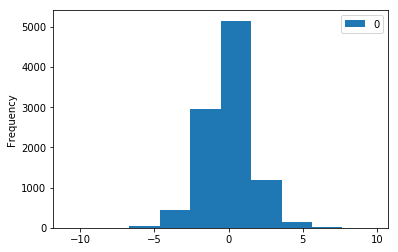

In [614]:
col = labels
df = pd.DataFrame(data=col)
df.plot.hist()
print(max(col))
print(min(col))

In [615]:
# For a single-input model with 2 classes (binary classification):

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=100))
model.add(Dense(100, activation='relu', input_dim=100))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
              loss='mse')

# Train the model, iterating on the data in batches of 32 samples
model.fit(x_train, y_train, epochs=7, batch_size=32)



Epoch 1/7
9000/9000 [==============================] - 4s 499us/step - loss: 2.5838
Epoch 2/7
9000/9000 [==============================] - 1s 100us/step - loss: 2.0612
Epoch 3/7
9000/9000 [==============================] - 1s 101us/step - loss: 1.2880
Epoch 4/7
9000/9000 [==============================] - 1s 102us/step - loss: 1.0262
Epoch 5/7
9000/9000 [==============================] - 1s 122us/step - loss: 0.8713
Epoch 6/7
9000/9000 [==============================] - 1s 121us/step - loss: 0.7426
Epoch 7/7
9000/9000 [==============================] - 1s 96us/step - loss: 0.6348


In [606]:
def check_pred(model, x_valid, y_valid, y_train):
    predictions = [x for l in model.predict(x_valid).tolist() for x in l]
    loss = np.mean(np.power(predictions-y_valid, 2))
    naive = np.mean(np.power(y_valid-np.mean(y_train), 2))
    print(loss)
    print(naive)
    print(np.log(naive/loss))

In [610]:
check_pred(model, x_valid, y_valid, y_train)

0.002607953055099813
0.002173088837499211
-0.1824160606983517


In [440]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=100, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [447]:
model = baseline_model()
model.fit(x_train, y_train, epochs=7, batch_size=32)

Epoch 1/7
9000/9000 [==============================] - 4s 409us/step - loss: 1.0144
Epoch 2/7
9000/9000 [==============================] - 1s 81us/step - loss: 1.0092
Epoch 3/7
9000/9000 [==============================] - 1s 84us/step - loss: 1.0017
Epoch 4/7
9000/9000 [==============================] - 1s 84us/step - loss: 0.9923
Epoch 5/7
9000/9000 [==============================] - 1s 85us/step - loss: 0.9811
Epoch 6/7
9000/9000 [==============================] - 1s 83us/step - loss: 0.9704
Epoch 7/7
9000/9000 [==============================] - 1s 86us/step - loss: 0.9565


In [448]:
check_pred(model, x_valid, y_valid, y_train)

1.0167685932670834
0.9996863044091999
-0.01694329740204162


In [442]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=7, batch_size=5, verbose=1)

In [99]:
kfold = KFold(n_splits=3, random_state=seed)
results = cross_val_score(estimator, data, labels, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/7
6666/6666 [==============================] - 3s 506us/step - loss: 0.0207
Epoch 2/7
6666/6666 [==============================] - 2s 339us/step - loss: 0.0167
Epoch 3/7
6666/6666 [==============================] - 3s 382us/step - loss: 0.0165
Epoch 4/7
6666/6666 [==============================] - 2s 345us/step - loss: 0.0164
Epoch 5/7
6666/6666 [==============================] - 3s 483us/step - loss: 0.0162
Epoch 6/7
6666/6666 [==============================] - 3s 445us/step - loss: 0.0163
Epoch 7/7
3334/3334 [==============================] - 1s 414us/step
Epoch 1/7
6667/6667 [==============================] - 3s 484us/step - loss: 0.0201
Epoch 2/7
6667/6667 [==============================] - 2s 338us/step - loss: 0.0165
Epoch 3/7
6667/6667 [==============================] - 3s 512us/step - loss: 0.0163
Epoch 4/7
6667/6667 [==============================] - 4s 610us/step - loss: 0.0161
Epoch 5/7
6667/6667 [==============================] - 3s 427us/step - loss: 0.0160
Epoch 6